In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from principal_RBM_alpha_coherent import RBM
from read_save import lire_alpha_digit, afficher_alpha_digit_random

### Explo RBM

In [3]:
LIST_IDX_DATA = [2,5,10]
data = lire_alpha_digit(LIST_IDX_DATA)

In [4]:
data.shape

(117, 320)

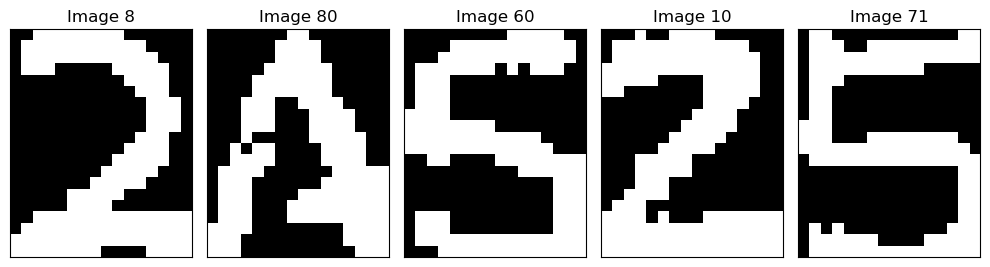

In [5]:
afficher_alpha_digit_random(data)

In [6]:
data.shape

(117, 320)

In [7]:
p = data.shape[1]
q = 50
learning_rate = 0.1
nb_epochs = 300
mini_batch_size = 32

In [8]:
RBM_model = RBM(p,q)

In [9]:
RBM_model.train_RBM(nb_epochs, learning_rate, mini_batch_size, data, verbose=True, step = 25)

Epoch 1/300, erreur de reconstruction: 0.22093048636389112
Epoch 26/300, erreur de reconstruction: 0.1446498696796086
Epoch 51/300, erreur de reconstruction: 0.11530454674883998
Epoch 76/300, erreur de reconstruction: 0.09896750648108185
Epoch 101/300, erreur de reconstruction: 0.08818994586529544
Epoch 126/300, erreur de reconstruction: 0.08056053815484061
Epoch 151/300, erreur de reconstruction: 0.07448079512132656
Epoch 176/300, erreur de reconstruction: 0.06957821763475172
Epoch 201/300, erreur de reconstruction: 0.06529425954764466
Epoch 226/300, erreur de reconstruction: 0.06150385821458923
Epoch 251/300, erreur de reconstruction: 0.058308421615383514
Epoch 276/300, erreur de reconstruction: 0.05524137796637488
Epoch 300/300, erreur de reconstruction: 0.05301152301101461


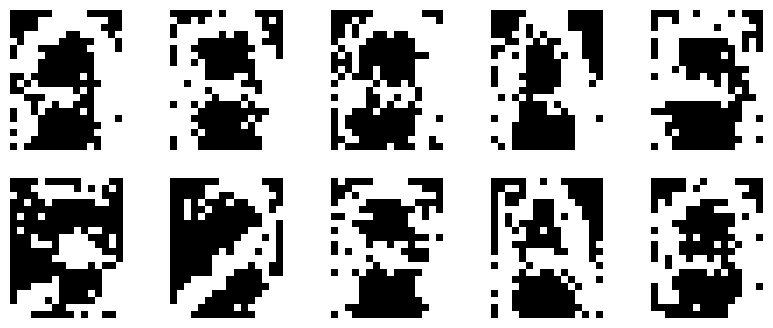

In [10]:
RBM_model.generer_image_RBM(nb_images = 10, nb_iter_gibbs=100)

Epoch1/300


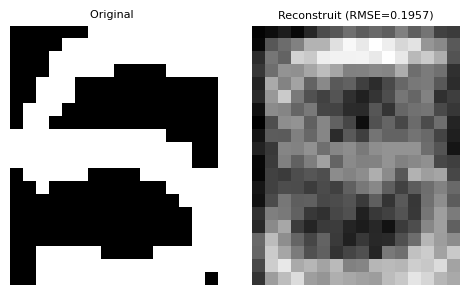

Epoch26/300


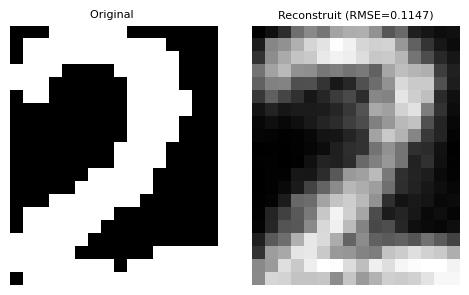

Epoch51/300


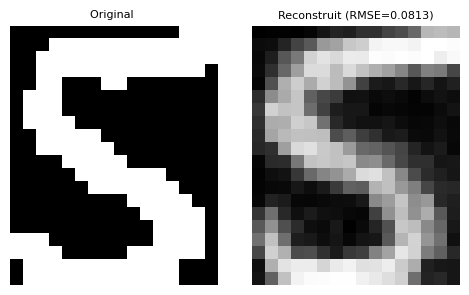

Epoch76/300


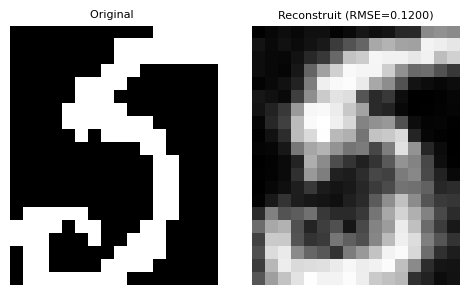

Epoch101/300


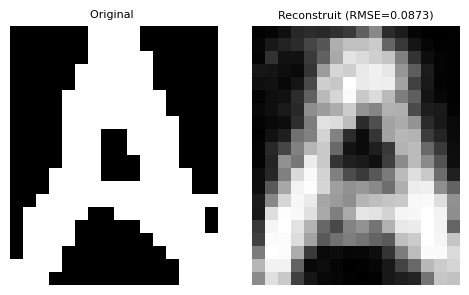

Epoch126/300


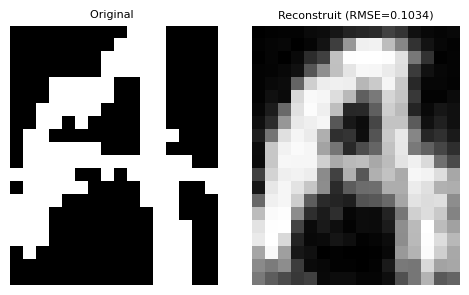

Epoch151/300


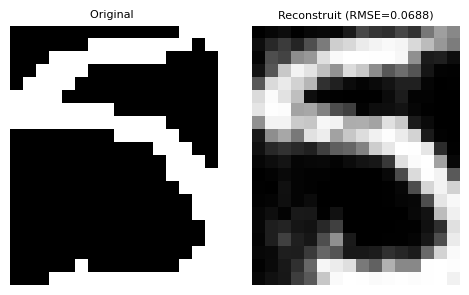

Epoch176/300


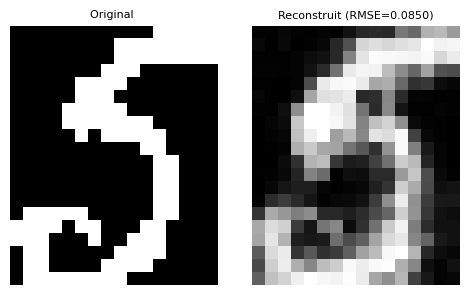

Epoch201/300


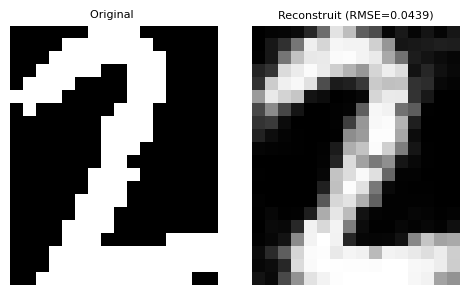

Epoch226/300


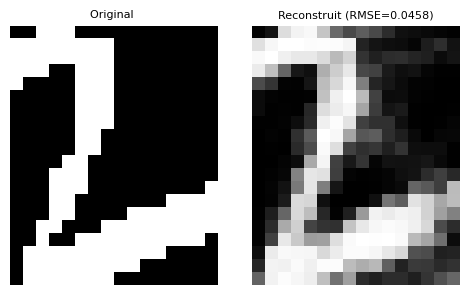

Epoch251/300


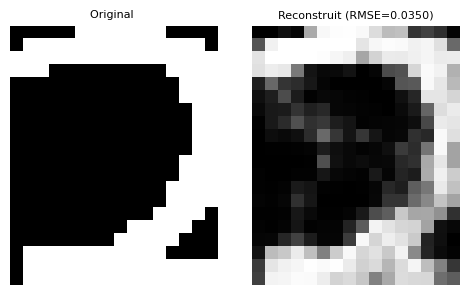

Epoch276/300


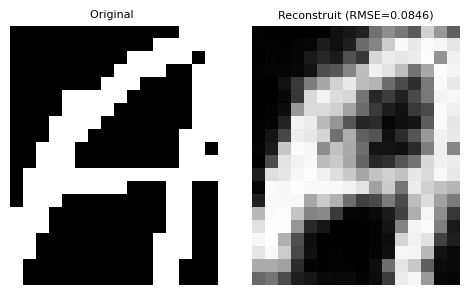

Epoch300/300


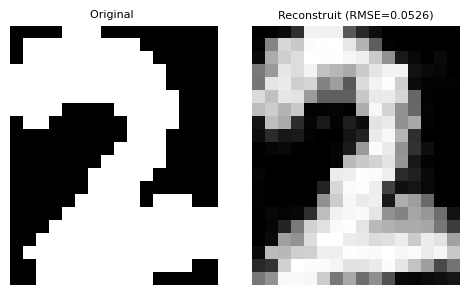

In [11]:
RBM_model.afficher_image_RBM_vs_original()

## Analyse RBM
### Checker l'influence des paramètres :
- nb_epochs
- learning_rate
- mini_batch_size
- taille couche cachée : q (à vu d'oeil 10 moins bien que 1000)

#### Comment évolue la loss en fonction de l'avancée dans le training (epoch) ?

#### Influence du nombre d'epochs choisi : nb_epochs
On garde la même q (= 50) utilisée en début de test pour notre classe RBM. Pour pouvoir voir l'influence des autres paramètres

In [12]:
p = data.shape[1]
q = 50
learning_rate = 0.1
mini_batch_size = 32

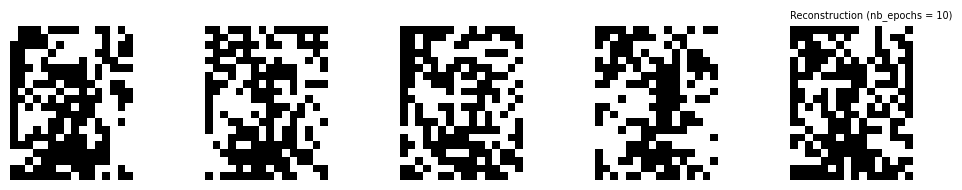

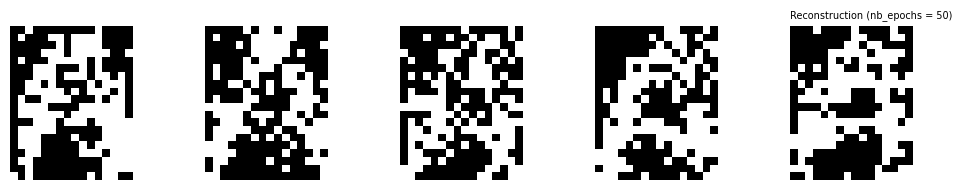

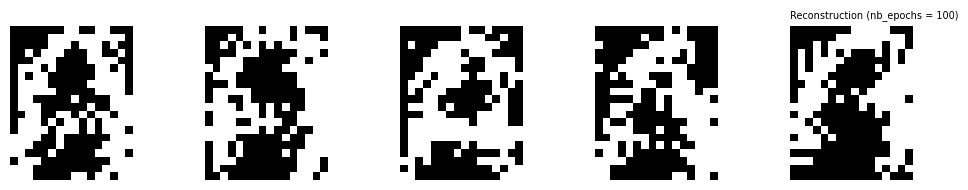

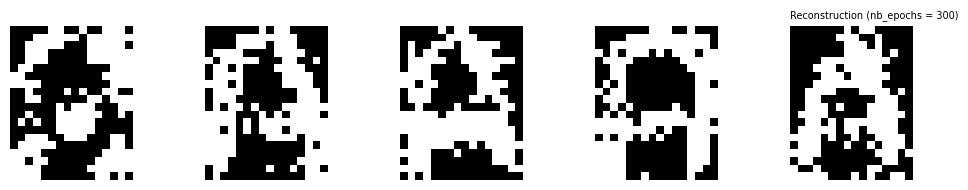

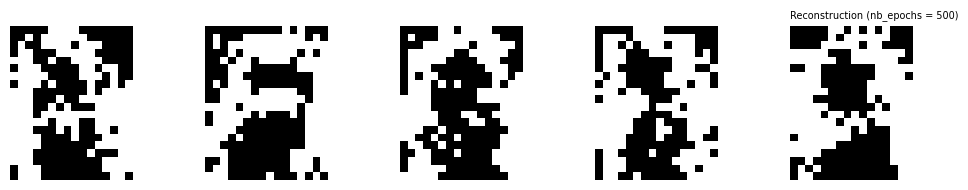

In [13]:
nb_epochs = [10, 50, 100, 300, 500]
all_losses = []
for epoch in nb_epochs:
    RBM_model = RBM(p, q)
    RBM_model.train_RBM(epoch, learning_rate, mini_batch_size, data, verbose=False, step=25)
    all_losses.append(RBM_model.losses)
    RBM_model.analyse_RBM(nb_gibbs=10, nb_image=5, param_analysed="nb_epochs")

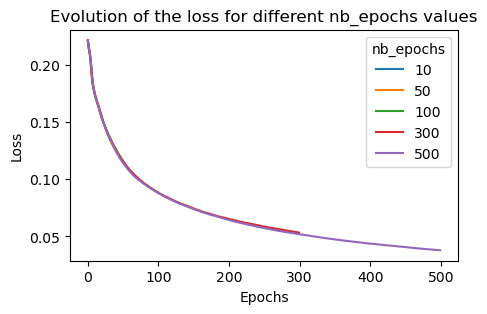

In [14]:
# Affichage des courbes de RMSE
plt.figure(figsize=(5, 3))
for i, loss in enumerate(all_losses):
    plt.plot(loss, label=f"{nb_epochs[i]}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(title="nb_epochs")
plt.title("Evolution of the loss for different nb_epochs values")
plt.show()

#### Influence du learning_rate

In [15]:
p = data.shape[1]
q = 50
nb_epochs = 300
mini_batch_size = 32

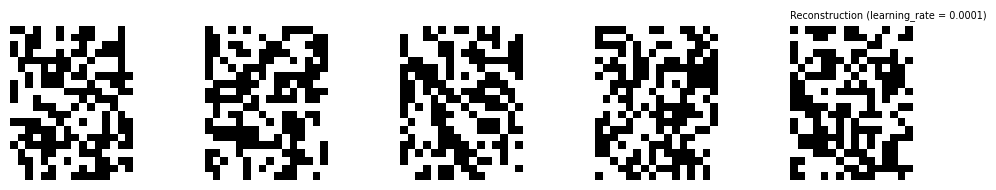

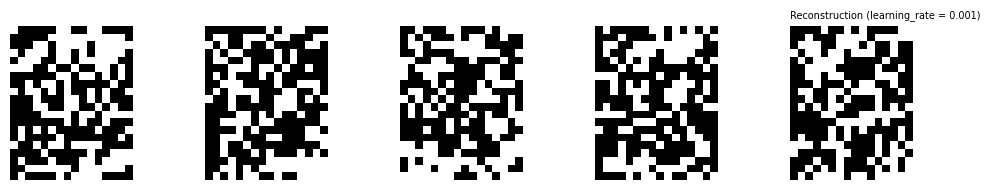

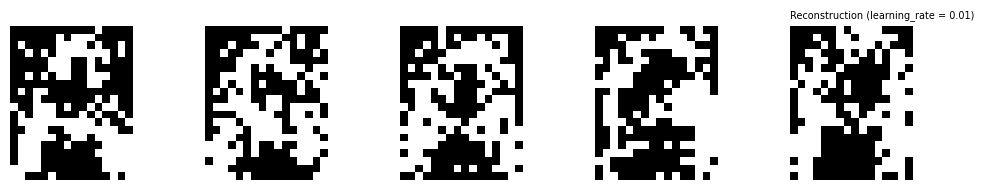

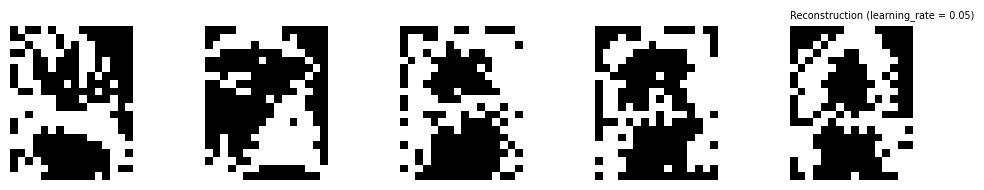

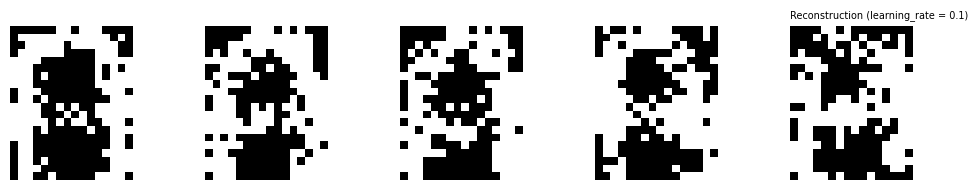

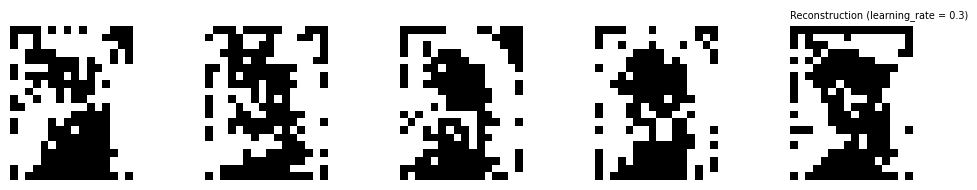

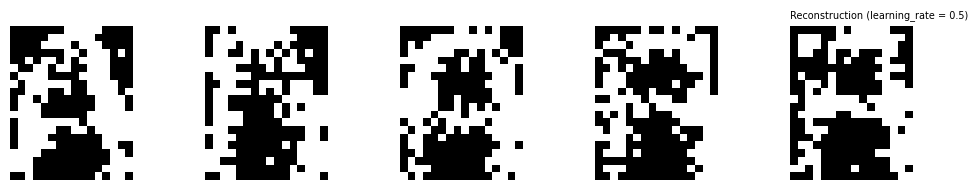

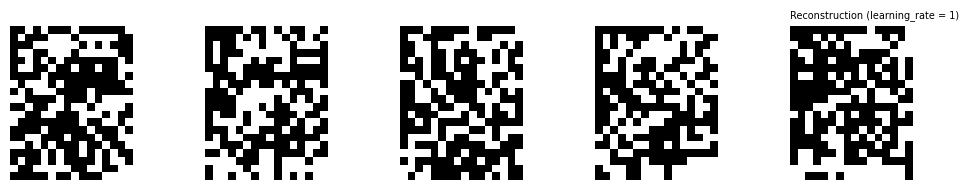

In [16]:
learning_rates = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 1]
all_losses = []
for lr in learning_rates:
    RBM_model = RBM(p, q)
    RBM_model.train_RBM(nb_epochs, lr, mini_batch_size, data, verbose=False, step=25)        # détails -> verbose=True
    all_losses.append(RBM_model.losses)
    RBM_model.analyse_RBM(nb_gibbs=10, nb_image=5, param_analysed="learning_rate")

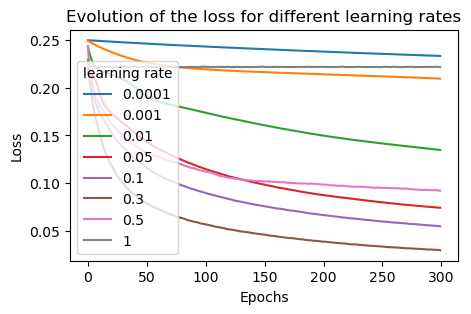

In [17]:
# Affichage des courbes de RMSE
plt.figure(figsize=(5, 3))
for i, loss in enumerate(all_losses):
    plt.plot(loss, label=f"{learning_rates[i]}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(title="learning rate")
plt.title("Evolution of the loss for different learning rates")
plt.show()

Si learning_rate (lr) trop faible ie < 0.01 alors modèle inefficace ; Mais si lr trop élevé, modèle n'apprends pas bien. Trouver un juste milieu -> lr = 0.1 ou 0.3 c'est suffisant pour l'instant

#### Influence du nombre de batchs choisi : mini_batch_size


In [18]:
p = data.shape[1]
q = 50
learning_rate = 0.1
nb_epochs = 300
mini_batch_size = 32

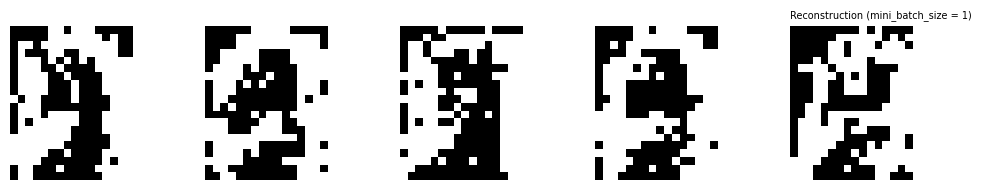

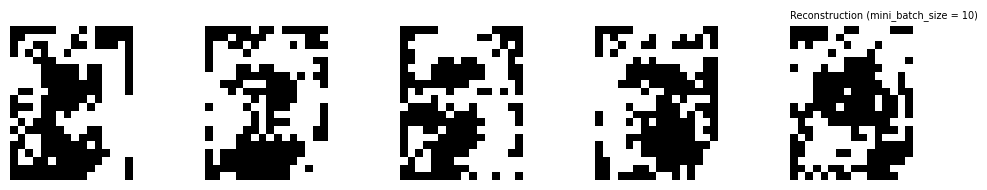

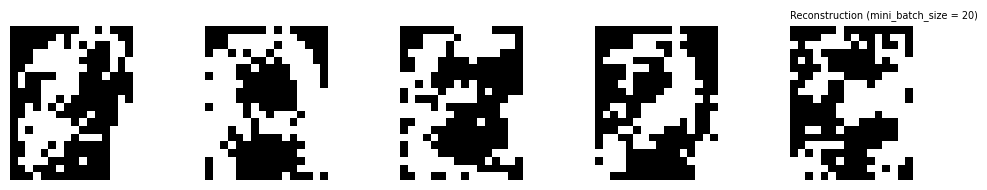

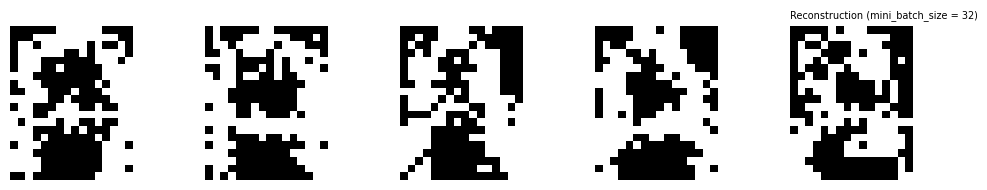

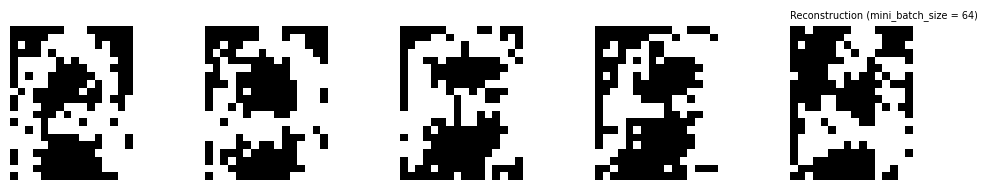

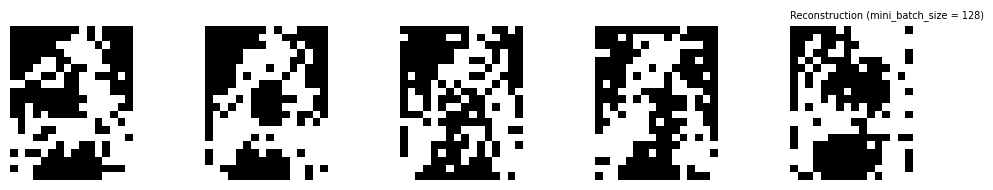

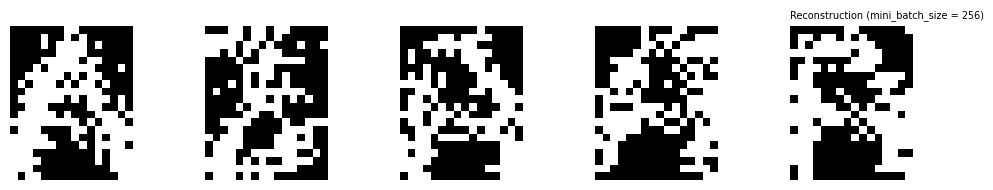

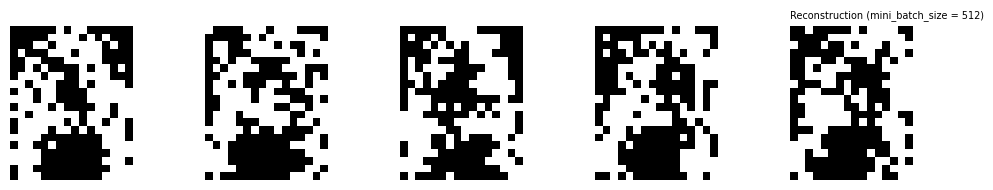

In [19]:
mini_batch_sizes = [1, 10, 20, 32, 64, 128, 256, 512]
all_losses = []
for batch in mini_batch_sizes:
    RBM_model = RBM(p, q)
    RBM_model.train_RBM(nb_epochs, learning_rate, batch, data, verbose=False, step=25)        # détails -> verbose=True
    all_losses.append(RBM_model.losses)
    RBM_model.analyse_RBM(nb_gibbs=10, nb_image=5, param_analysed="mini_batch_size")

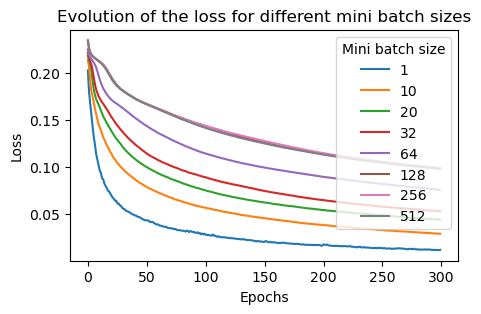

In [20]:
# Affichage des courbes de RMSE
plt.figure(figsize=(5, 3))
for i, loss in enumerate(all_losses):
    plt.plot(loss, label=f"{mini_batch_sizes[i]}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(title="Mini batch size")
plt.title("Evolution of the loss for different mini batch sizes")
plt.show()

Une valeur de mini_batch_size trop élevé (> 128), ralentirait la convergence de notre modèle. Jusqu'à là, on prenais mini_batch_size = 32, mais on pourrait prendre = 20 je pense.

### Influence de la taille de la couche cachée

In [21]:
p = data.shape[1]
learning_rate = 0.1
mini_batch_size = 32
nb_epochs = 300

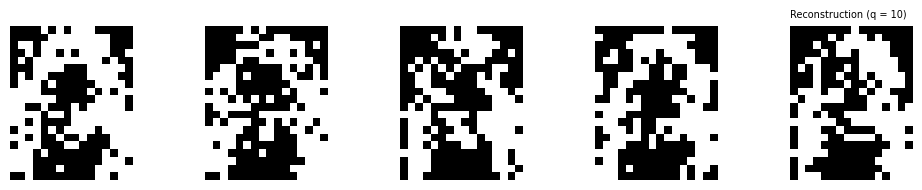

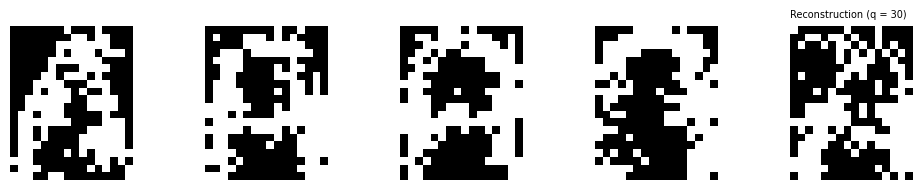

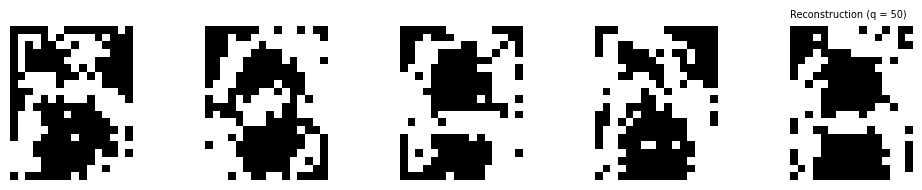

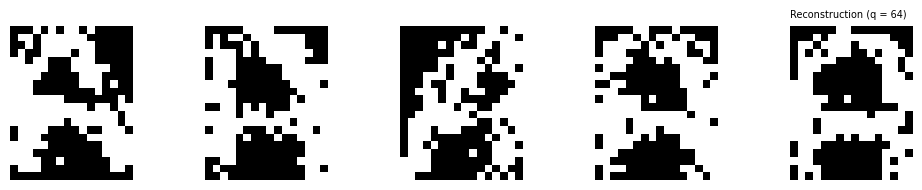

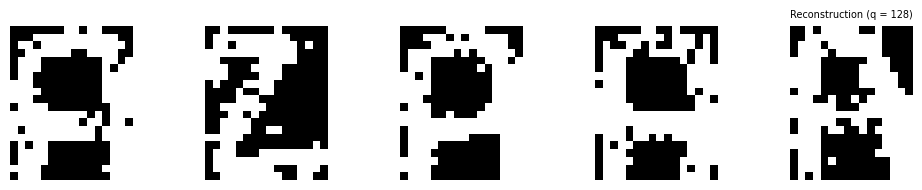

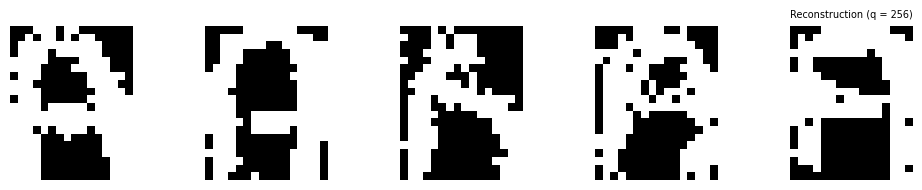

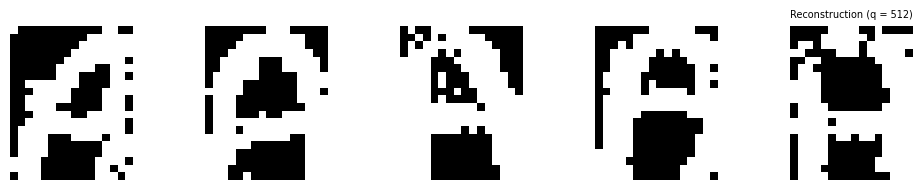

In [22]:
Q = [10, 30, 50, 64, 128, 256, 512]
all_losses = []
for q in Q:
    RBM_model = RBM(p, q)
    RBM_model.train_RBM(nb_epochs, learning_rate, mini_batch_size, data, verbose=False, step=25)        # détails -> verbose=True
    all_losses.append(RBM_model.losses)
    RBM_model.analyse_RBM(nb_gibbs=10, nb_image=5, param_analysed="q")

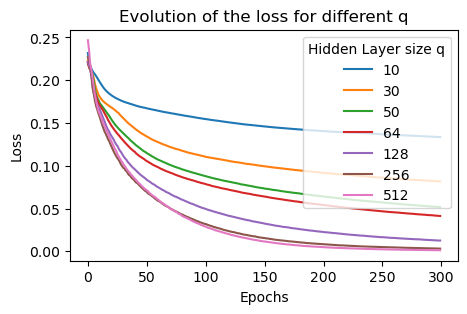

In [23]:
# Affichage des courbes de RMSE
plt.figure(figsize=(5, 3))
for i, loss in enumerate(all_losses):
    plt.plot(loss, label=f"{Q[i]}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(title="Hidden Layer size q")
plt.title("Evolution of the loss for different q")
plt.show()

C'est cohérent avec la littérature. En effet, on constate que la dimension de l'espace latent, c'est-à-dire le nombre d'états cachés, joue un rôle majeur dans la qualité de la génération de l'image.

### Explo DBN

In [24]:
from principal_DBN_alpha import DBN

In [25]:
LIST_IDX_DATA = [2,5,10]
data = lire_alpha_digit(LIST_IDX_DATA)

In [26]:
data.shape

(117, 320)

In [27]:
layer_sizes = [320, 200, 150, 100]
learning_rate = 0.1
nb_epochs = 300
mini_batch_size = 32

In [28]:
DBN_model = DBN(layer_sizes)

In [29]:
DBN_model.train_DBN(nb_epochs, learning_rate, mini_batch_size, data, verbose=True, step = 25)

Entraînement DBN avec 3 RBMs
Entraînement RBM 1 / 3
Epoch 1/300, erreur de reconstruction: 0.22318698512894058
Epoch 26/300, erreur de reconstruction: 0.11057393402444184
Epoch 51/300, erreur de reconstruction: 0.07282438408780885
Epoch 76/300, erreur de reconstruction: 0.050135917785472044
Epoch 101/300, erreur de reconstruction: 0.035339910631838674
Epoch 126/300, erreur de reconstruction: 0.025843998698190932
Epoch 151/300, erreur de reconstruction: 0.01919638861821206
Epoch 176/300, erreur de reconstruction: 0.014769827899589107
Epoch 201/300, erreur de reconstruction: 0.01144719430169775
Epoch 226/300, erreur de reconstruction: 0.009046531611474002
Epoch 251/300, erreur de reconstruction: 0.007352334699406001
Epoch 276/300, erreur de reconstruction: 0.005993776543960765
Epoch 300/300, erreur de reconstruction: 0.005065252883170087
Entraînement RBM 2 / 3
Epoch 1/300, erreur de reconstruction: 0.18667569090561434
Epoch 26/300, erreur de reconstruction: 0.09523862265175888
Epoch 51/3

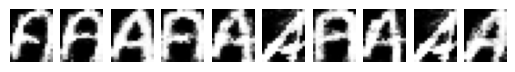

In [30]:
DBN_model.generer_image_DBN(nb_images = 10, nb_iter_gibbs=100)

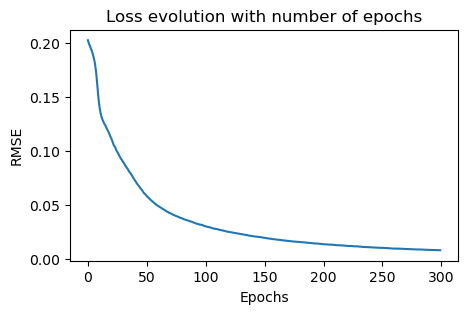

In [31]:
plt.figure(figsize=(5, 3))
plt.plot(DBN_model.losses[-1])
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Loss evolution with number of epochs')
plt.show()

#### Influence du nombre d'epochs choisi : nb_epochs

In [32]:
layer_sizes = [320, 200, 150, 100]
learning_rate = 0.1
mini_batch_size = 32

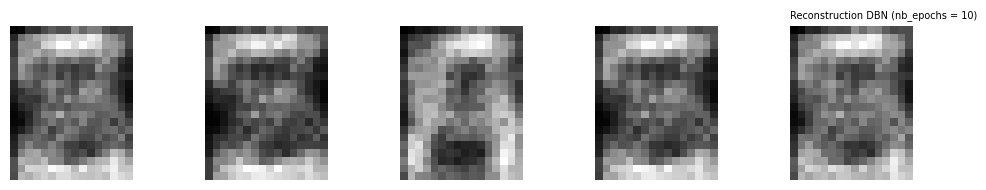

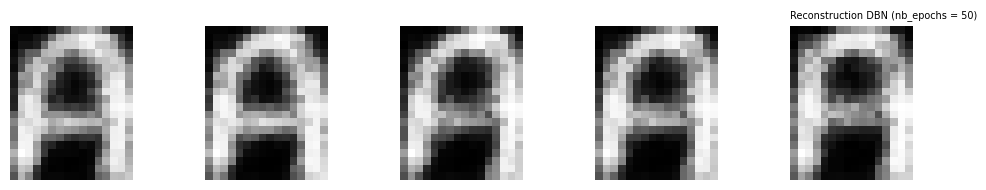

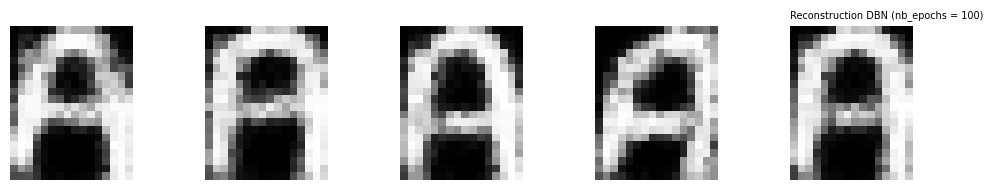

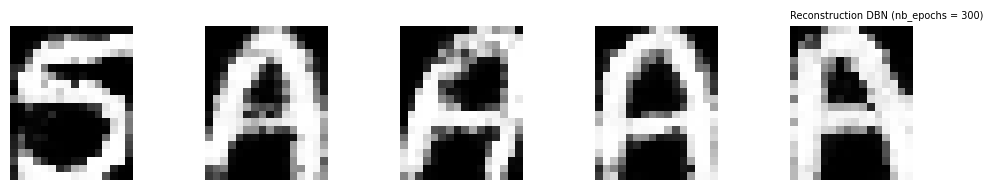

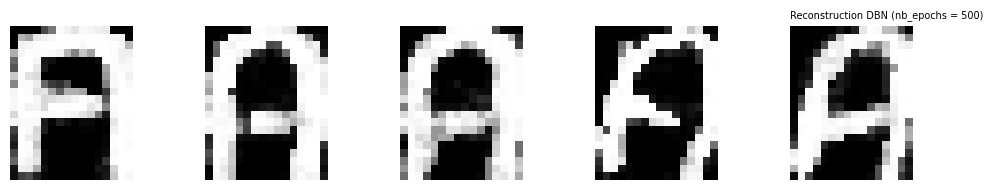

In [33]:
nb_epochs = [10, 50, 100, 300, 500]
all_losses = []
for epoch in nb_epochs:
    DBN_model = DBN(layer_sizes)
    DBN_model.train_DBN(epoch, learning_rate, mini_batch_size, data, verbose=False, step=25)
    all_losses.append(DBN_model.losses[-1])
    DBN_model.analyse_DBN(nb_gibbs=10, nb_image=5, param_analysed="nb_epochs")

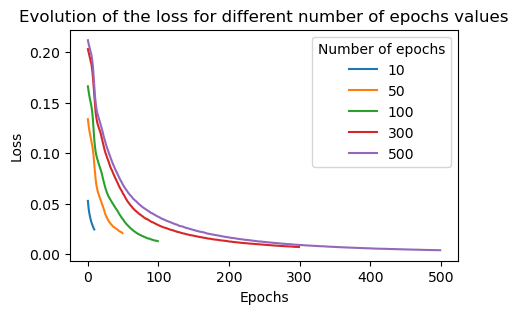

In [34]:
# Affichage des courbes de RMSE
plt.figure(figsize=(5, 3))
for i, loss in enumerate(all_losses):
    plt.plot(loss, label=f"{nb_epochs[i]}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(title="Number of epochs")
plt.title("Evolution of the loss for different number of epochs values")
plt.show()

### Influence de la valeur du learning rate

In [35]:
layer_sizes = [320, 200, 150, 100]
mini_batch_size = 32
nb_epochs = 300

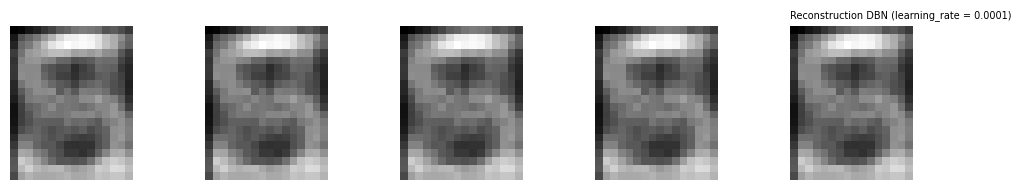

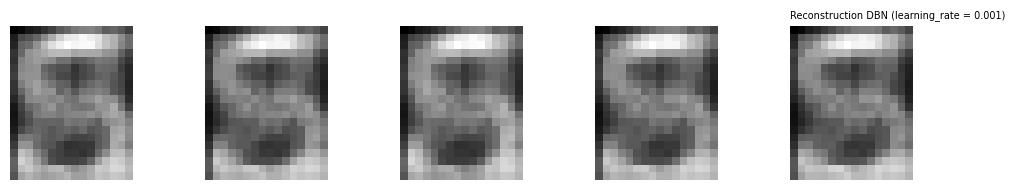

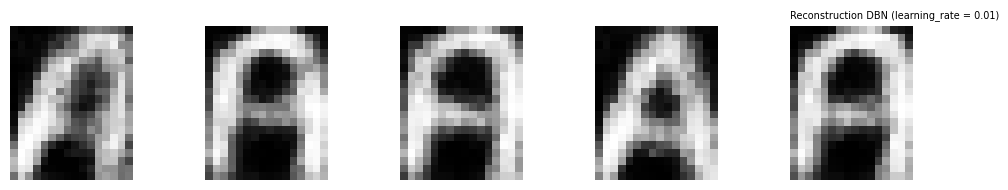

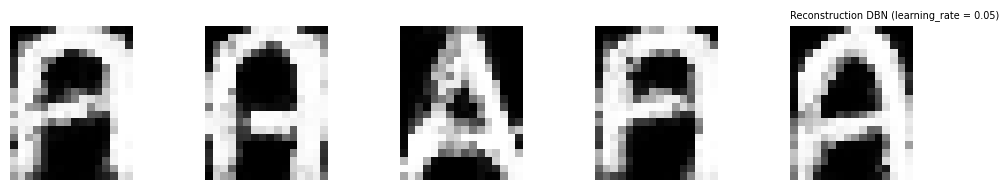

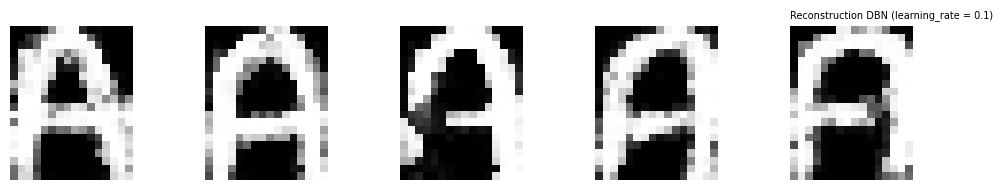

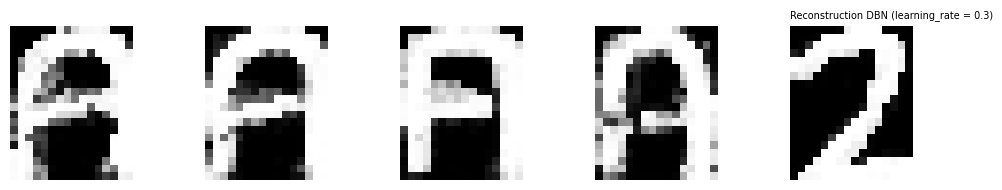

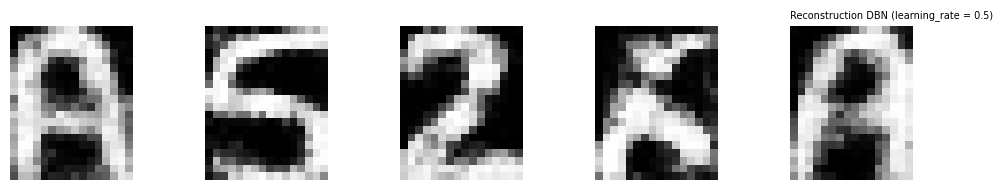

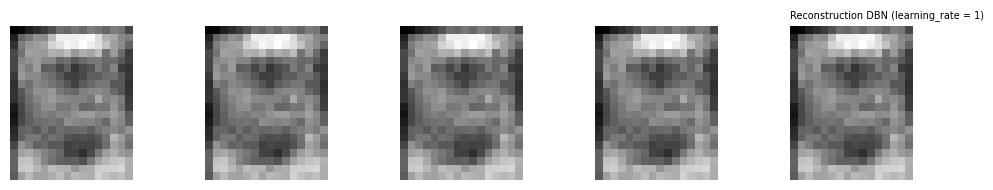

In [36]:
learning_rates = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 1]
all_losses = []
for lr in learning_rates:
    DBN_model = DBN(layer_sizes)
    DBN_model.train_DBN(epoch, lr, mini_batch_size, data, verbose=False, step=25)
    all_losses.append(DBN_model.losses[-1])
    DBN_model.analyse_DBN(nb_gibbs=10, nb_image=5, param_analysed="learning_rate")

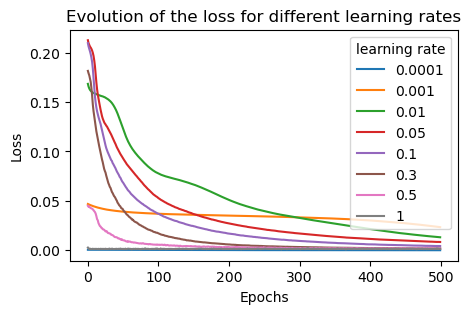

In [37]:
# Affichage des courbes de RMSE
plt.figure(figsize=(5, 3))
for i, loss in enumerate(all_losses):
    plt.plot(loss, label=f"{learning_rates[i]}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(title="learning rate")
plt.title("Evolution of the loss for different learning rates")
plt.show()

### Influence du nombre de mini batch

In [38]:
layer_sizes = [320, 200, 150, 100]
learning_rate = 0.1
nb_epochs = 300

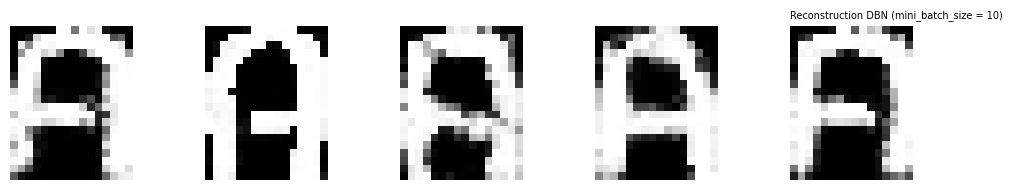

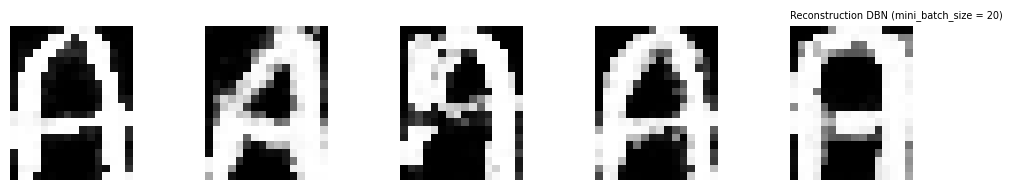

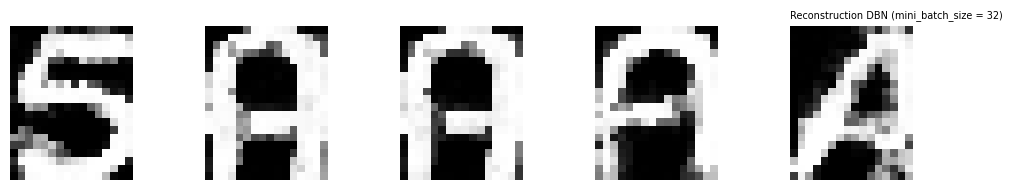

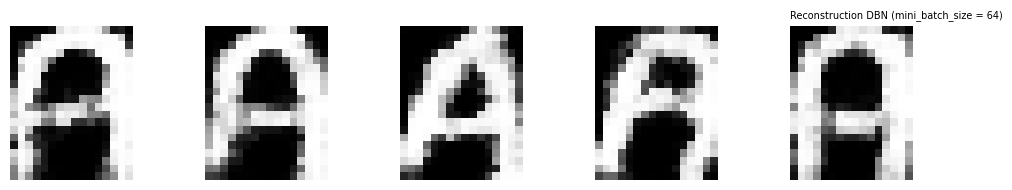

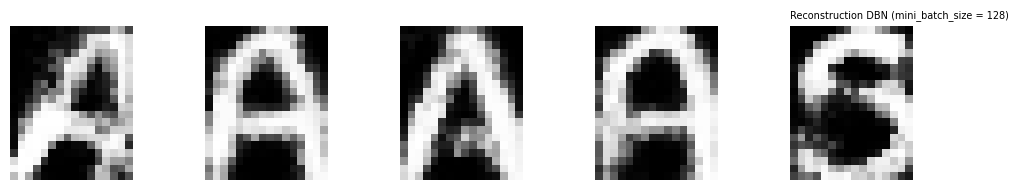

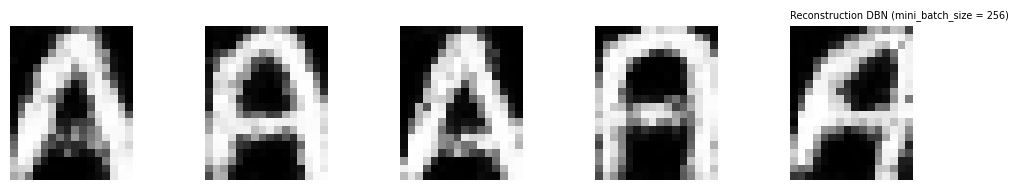

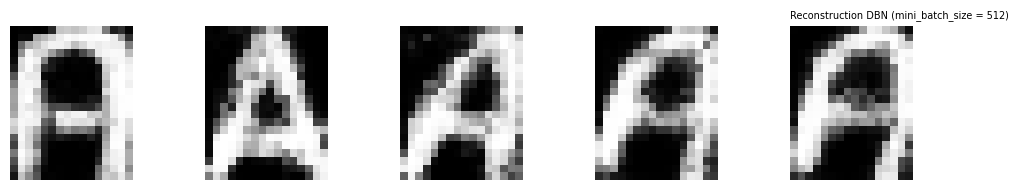

In [39]:
mini_batch_sizes = [10, 20, 32, 64, 128, 256, 512]
all_losses = []
for batch in mini_batch_sizes:
    DBN_model = DBN(layer_sizes)
    DBN_model.train_DBN(epoch, learning_rate, batch, data, verbose=False, step=25)
    all_losses.append(DBN_model.losses[-1])
    DBN_model.analyse_DBN(nb_gibbs=10, nb_image=5, param_analysed="mini_batch_size")

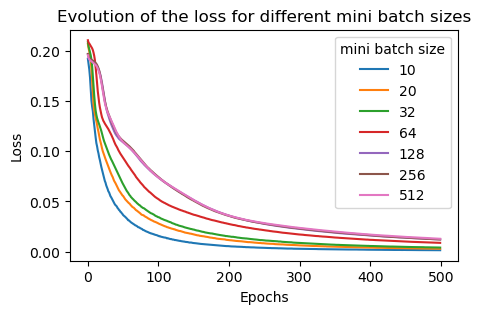

In [40]:
# Affichage des courbes de RMSE
plt.figure(figsize=(5, 3))
for i, loss in enumerate(all_losses):
    plt.plot(loss, label=f"{mini_batch_sizes[i]}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(title="mini batch size")
plt.title("Evolution of the loss for different mini batch sizes")
plt.show()

### Influence du nombre de layer : layer_sizes

In [41]:
learning_rate = 0.1
mini_batch_size = 32
nb_epochs = 300

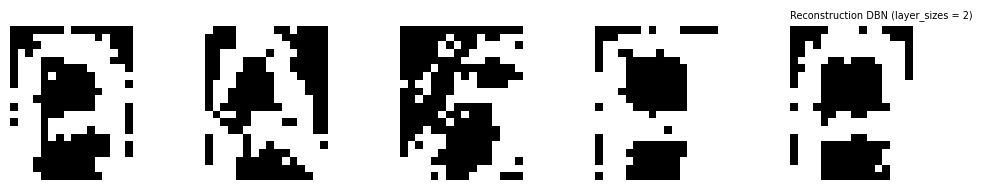

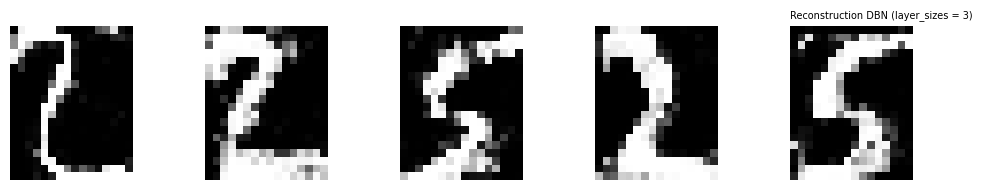

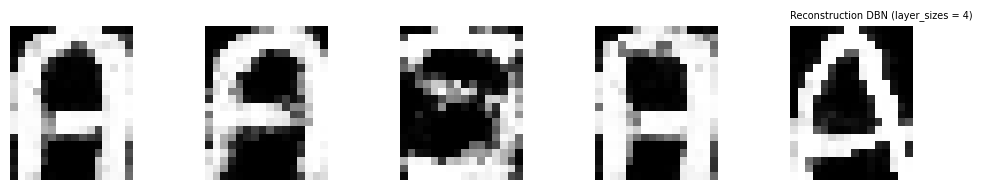

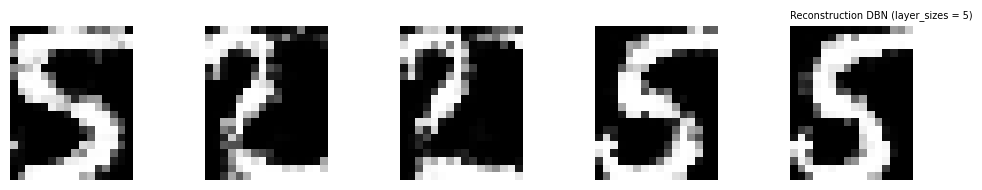

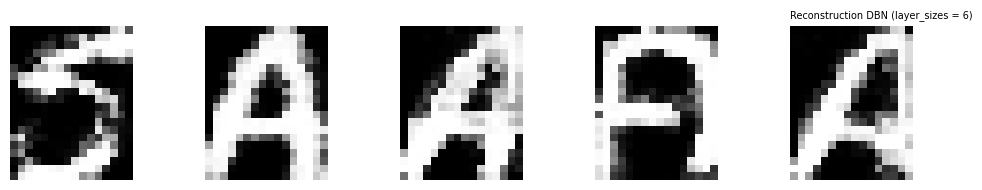

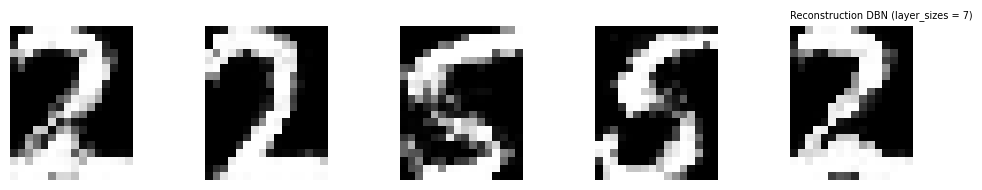

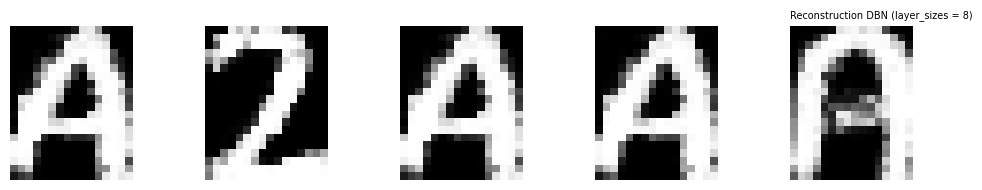

In [45]:
test_layer_sizes = [[320,150], [320,200,150], [320,200,150,100], [320,200,150,100,50], [320,200,150,100,50,25], [320,200,150,100,50,25,10], [320,200,150,100,50,25,10,5]]
all_losses = []
for layer_size in test_layer_sizes:
    DBN_model = DBN(layer_size)
    DBN_model.train_DBN(epoch, learning_rate, mini_batch_size, data, verbose=False, step=25)
    all_losses.append(DBN_model.losses[-1])
    DBN_model.analyse_DBN(nb_gibbs=10, nb_image=5, param_analysed="layer_sizes")

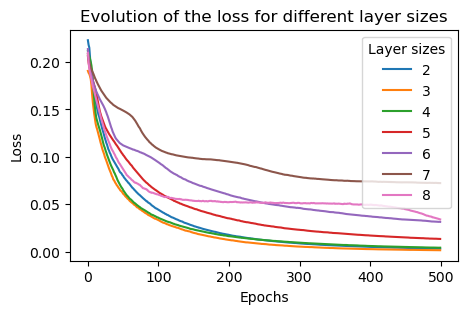

In [51]:
# Affichage des courbes de RMSE
plt.figure(figsize=(5, 3))
for i, loss in enumerate(all_losses):
    plt.plot(loss, label=f"{len(test_layer_sizes[i])}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(title="Layer sizes")
plt.title("Evolution of the loss for different layer sizes")
plt.show()